In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Documentação

Importação dos banco de dados

In [186]:
df_ocorrencias = pd.read_csv('ocorrencias_2023.csv', encoding='latin1', sep=';')
df_homicidios = pd.read_csv('homicidios_2023.csv', encoding='latin1', sep=';')
df_objetos = pd.read_csv('objetos_2023.csv', encoding='latin1', sep=';')

#Função para Limpar e Padronizar o Banco de Dados
def abrir_dados():
    global dados
    dados = [df_ocorrencias, df_objetos, df_homicidios]

    def ajustes(df):
        
        if df is df_ocorrencias:
            #Renomear
            df.rename(columns={'Nº OCORReNCIA':'OCORRENCIA',
                                'DATA DO FATO':'DATA',
                                'HORA DO FATO': 'HORA',
                                'MUNICiPIO': 'MUNICIPIO',
                                'GRUPO DE INCIDENTE': 'GRUPO DE CRIMES'}, inplace=True)

                #Tipos
            df['DATA'] = pd.to_datetime(df['DATA'], format='%d/%m/%Y').dt.strftime('%d/%m/%Y')
            df['HORA'] = df['HORA'].replace('Indeterminada', np.nan)
            
            #Excluir colunas
            df.drop(columns='UF', inplace=True)

            #Padronização dos Valores
            df['GRUPO DE CRIMES'] = df['GRUPO DE CRIMES'].replace({
                    'CRIMES CONTRA PATRIMoNIO' : 'Contra Patrimônio',
                    'CRIMES DIVERSOS' : 'Diversos'
                })
            df['TIPO DE INCIDENTE'] = df['TIPO DE INCIDENTE'].replace({
                    'CRIMES CONTRA PATRIMoNIO: ESTELIONATO/FRAUDE' : 'Estelionato/Fraude',
                    'CRIMES CONTRA PATRIMoNIO: ROUBO: A PESSOA EM VIA PuBLICA' : 'Roubo: Pessoa em Via Pública',
                    'CRIMES CONTRA PATRIMoNIO: FURTO: EM RESIDeNCIA/CONDOMiNIO' : 'Furto: Residência/Condomínio',
                    'CRIMES CONTRA PATRIMoNIO: FURTO: EM ESTABELECIMENTO COMERCIAL' : 'Furto: Estabelecimento Comercial',
                    'CRIMES CONTRA PATRIMoNIO: FURTO: A PESSOA EM VIA PuBLICA' : 'Furto: Pessoa em Via Pública',
                    'CRIMES DIVERSOS: CRIMES INFORMATICOS' : 'Crimes Informáticos',
                    'CRIMES CONTRA PATRIMoNIO: ROUBO: EM TRANSPORTE COLETIVO' : 'Roubo: Transporte Coletivo',
                    'CRIMES CONTRA PATRIMoNIO: FURTO: EM TRANSPORTE COLETIVO' : 'Furto: Transporte Coletivo',
                    'CRIMES CONTRA PATRIMoNIO: ROUBO: EM ESTABELECIMENTO COMERCIAL' : 'Roubo: Estabelecimento Comercial',
                    'CRIMES CONTRA PATRIMoNIO: ROUBO: EM RESIDeNCIA/CONDOMiNIO' : 'Roubo: Residência/Condomínio'

            })
            df['TIPO DE LOCAL'] = df['TIPO DE LOCAL'].str.title()
            df['BAIRRO'] = df['BAIRRO'].str.title()
            df['MUNICIPIO'] = df['MUNICIPIO'].str.title()
            df['LOGRADOURO'] = df['LOGRADOURO'].str.title()

        elif df is df_homicidios:
            #Renomear
            df.rename(columns={'Nº OCORRENCIA':'OCORRENCIA',
                                'DATA DO FATO':'DATA',
                                'HORA DO FATO': 'HORA',}, inplace=True)
            
            df['TIPO DE INCIDENTE'] = df['TIPO DE INCIDENTE'].replace({
                'CRIMES CONTRA A PESSOA: HOMICIDIO DOLOSO' : 'Homicídio Doloso'
            })
            df['BAIRRO'] = df['BAIRRO'].str.title()
            df['MUNICIPIO'] = df['MUNICIPIO'].str.title()
            df['TIPO LOCAL'] = df['TIPO LOCAL'].str.title()

            #Excluir colunas
            df.drop(columns='UF', inplace=True)
            df.drop(columns='GRUPO DE INCIDENTE', inplace=True)

            #Tipos
            df['DATA'] = pd.to_datetime(df['DATA'], format='%d/%m/%Y').dt.strftime('%d/%m/%Y')
            df['HORA'] = df['HORA'].replace('Indeterminada', np.nan)


        elif df is df_objetos:
            #Renomear
            df.rename(columns={'Nº OCORRÊNCIA':'OCORRENCIA',
                                'DATA DO FATO':'DATA',
                                'HORA DO FATO': 'HORA',}, inplace=True)
            
            df['OBJETO'] = df['OBJETO'].replace({
                'APARELHOS TELEFONICOS' : 'Aparelhos Telefônicos',
                'VEICULO' : 'Veículo',
                'BICICLETA' : 'Bicicleta'
            })
            df.rename(columns={'AÇAO ': 'AÇAO'}, inplace=True)
            df['AÇAO'] = df['AÇAO'].str.title()
            df['MUNICIPIO'] = df['MUNICIPIO'].str.title()
            df['BAIRRO'] = df['BAIRRO'].str.title()
            df['TIPO DE LOCAL'] = df['TIPO DE LOCAL'].str.title()
            df['LOGRADOURO'] = df['LOGRADOURO'].str.title()
            
            #Tipos
            df['DATA'] = pd.to_datetime(df['DATA'], format='%d/%m/%Y').dt.strftime('%d/%m/%Y')
            df['HORA'] = df['HORA'].replace('Indeterminada', np.nan)

            #Excluir colunas
            df.drop(columns='UF', inplace=True)
            
        else:
            pass

        def arredondar_para_15minutos(hora):
            hora = pd.to_datetime(hora)
            minutos = hora.minute // 15 * 15
            return hora.replace(minute=minutos, second=0)


    # #Versão mais rápida
    #     def arredondar_para_15minutos(horas):
    #         horas = pd.to_datetime(horas)
    #         minutos = (horas.dt.minute // 15 * 15).astype(str).str.zfill(2)  # Arredonda os minutos para o intervalo de 15 minutos
    #         horas_arredondadas = horas.dt.strftime('%H:') + minutos + ':00'  # Formata a hora de volta
    #         return horas_arredondadas

    #     # Aplicando a função às colunas 'HORA' de todos os DataFrames
    #     for df in dados:
    #         if 'HORA' in df.columns:
    #             df['HORA'] = arredondar_para_15minutos(df['HORA'])



            # Arredondar os valores na coluna 'HORA'
        df['HORA'] = df['HORA'].apply(arredondar_para_15minutos)
        df['HORA'] = df['HORA'].dt.strftime('%H:%M:%S')


    def document():
        for df in dados:
            ajustes(df)
            global ocorrencias
            global homicidios
            global objetos
            if df is df_ocorrencias:
                ocorrencias = df_ocorrencias.copy()
            elif df is df_homicidios:
                homicidios = df_homicidios.copy()
            elif df is df_objetos:
                objetos = df_objetos.copy()
            else:
                ...
    document()

    print('---DOCUMENTAÇÃO---')
    print('ocorrencias = Dados sobre as Ocorrências\nhomicidios = Dados sobre os Homicídios\nobjetos = Dados sobre Objeto Furtados/roubados')

In [187]:
abrir_dados()

---DOCUMENTAÇÃO---
ocorrencias = Dados sobre as Ocorrências
homicidios = Dados sobre os Homicídios
objetos = Dados sobre Objeto Furtados/roubados


---

In [175]:
ocorrencias.sample(5)

,OCORRENCIA,DATA,HORA,GRUPO DE CRIMES,TIPO DE INCIDENTE,MUNICIPIO,BAIRRO,LOGRADOURO,TIPO DE LOCAL
33982,51393412,06/06/2023,17:00:00,Contra Patrimônio,Furto: Estabelecimento Comercial,Vitoria,Santa Luiza,Av N Sra Da Penha,Comercio
12463,50380114,24/02/2023,15:00:00,Contra Patrimônio,Estelionato/Fraude,Colatina,Operario,Rua Sao Heitor,Agencia Bancaria
17482,50762446,18/03/2023,12:00:00,Contra Patrimônio,Furto: Estabelecimento Comercial,Vitoria,Mario Cypreste,Sem Informacao,Comercio
41689,51741169,12/07/2023,NaN,Contra Patrimônio,Estelionato/Fraude,Vila Velha,Praia De Itaparica,Rua Maria Oliveira Mares Guia,Ambiente Web
70641,52967408,22/11/2023,10:00:00,Contra Patrimônio,Furto: Residência/Condomínio,Vitoria,Nova Palestina,Rua Jonael Socrates Medeiros Ferreira,Residencia


In [181]:
objetos.sample(5)

,OCORRENCIA,DATA,HORA,OBJETO,AÇAO,MUNICIPIO,BAIRRO,LOGRADOURO,TIPO DE LOCAL
20463,51988697,07/08/2023,11:00:00,Bicicleta,Furtado,Venda Nova Do Imigrante,Providencia,Av Domingos Perim,Via Publica
10076,50853731,11/04/2023,16:15:00,Aparelhos Telefônicos,Roubado,Serra,Sao Diogo Ii,Rua Guimaraes Junior,Via Publica
29252,52959808,18/11/2023,02:00:00,Aparelhos Telefônicos,Roubado,Vila Velha,Cocal,Sem Informaçao,Via Publica
13159,51197429,15/05/2023,18:30:00,Aparelhos Telefônicos,Roubado,Cariacica,Campo Grande,Avenida Expedito Garcia,Comercio
6063,50428385,02/03/2023,06:00:00,Bicicleta,Furtado,Guarapari,Praia Do Morro,Rua Esmeraldo De Oliveira Coutinho,Residência


In [182]:
homicidios.sample(5)

,OCORRENCIA,DATA,HORA,TIPO DE INCIDENTE,MUNICIPIO,BAIRRO,TIPO LOCAL
822,52791927,05/11/2023,16:15:00,Homicídio Doloso,Serra,Residencial Jacaraipe,Via Publica
783,52684543,25/10/2023,07:45:00,Homicídio Doloso,Vila Velha,Terra Vermelha,Via Publica
197,50475357,07/03/2023,02:30:00,Homicídio Doloso,Vila Velha,Novo Mexico,Terreno Baldio / Construcao / Mata
296,50799381,08/04/2023,08:15:00,Homicídio Doloso,Serra,Campinho Da Serra I,Terreno Baldio / Construcao / Mata
719,52468547,01/10/2023,00:15:00,Homicídio Doloso,Linhares,Juparana,Via Publica


---

In [212]:
#Função para excluir Estelionato/Fraude da coluna TIPO DE INCIDENTE e segmentar ocorrências por Município
def visao_geral_municipio(municipio):
    
    global ocorrencias_municipio
    ocorrencias_municipio = ocorrencias[(ocorrencias['MUNICIPIO'] == municipio) & (-ocorrencias['TIPO DE INCIDENTE'].isin(['Estelionato/Fraude', 'Crimes Informáticos']))]
    quantidade_ocorrencia = ocorrencias_municipio['OCORRENCIA'].nunique()
    top_bairros_mais_assalto = ocorrencias_municipio['BAIRRO'].value_counts().head(10)
    top_bairros_menos_assalto = ocorrencias_municipio['BAIRRO'].value_counts().tail(10)
    tipos_incidentes = ocorrencias_municipio['TIPO DE INCIDENTE'].value_counts().head(5)
    ocorrencias_roubo = ocorrencias_municipio[ocorrencias_municipio['TIPO DE INCIDENTE'].str.contains('Roubo')]
    contagem_roubo = ocorrencias_roubo['OCORRENCIA'].nunique()
    ocorrencias_furto = ocorrencias_municipio[ocorrencias_municipio['TIPO DE INCIDENTE'].str.contains('Furto')]
    contagem_furto = ocorrencias_furto['OCORRENCIA'].nunique()
    
    def hora(): #Função para excluir 00:00:00. Possível outlier
        global hora_incidente
        hora_incidente = ocorrencias_municipio[ocorrencias_municipio['HORA'] != '00:00:00']['HORA'].value_counts().head(5)

    hora()

    #Objetos
    objetos_municipio = objetos[objetos['MUNICIPIO'] == municipio]
    objetos_municipio_contagem = objetos_municipio['OBJETO'].value_counts()
    objetos_municipio_contagem_formatado = objetos_municipio_contagem.map('{:,.0f}'.format)

    print(f'Municipio: {municipio}')
    print('Ocorrências no município - 2023\nDados da Secretaria de Segurança Pública')
    print('')
    print('Números Ocorrências - Apenas Roubo e Furto')
    print(f'Total de ocorrências: {quantidade_ocorrencia}')
    print(f'Roubos: {contagem_roubo}')
    print(f'Furtos: {contagem_furto}')
    print('-------')
    print(f'Tipos de Incidentes:\n{tipos_incidentes}')
    print('-------')
    print(f'Bairros com maior n° de ocorrências:\n{top_bairros_mais_assalto}')
    print('-------')
    print(f'Hora do Incidente:\n{hora_incidente}')
    print('-------')
    print(f'Objetos mais roubados:\n{objetos_municipio_contagem_formatado}')


In [214]:
#Lista dos Municípios do Espírito Santo
contagem_objeto = ocorrencias['MUNICIPIO'].unique()
municipios = list(sorted(contagem_objeto))
municipios

['Afonso Claudio',
 'Agua Doce Do Norte',
 'Aguia Branca',
 'Alegre',
 'Alfredo Chaves',
 'Alto Rio Novo',
 'Anchieta',
 'Apiaca',
 'Aracruz',
 'Atilio Vivacqua',
 'Baixo Guandu',
 'Barra De Sao Francisco',
 'Boa Esperanca',
 'Bom Jesus Do Norte',
 'Brejetuba',
 'Cachoeiro De Itapemirim',
 'Cariacica',
 'Castelo',
 'Colatina',
 'Conceicao Da Barra',
 'Conceicao Do Castelo',
 'Divino De Sao Lourenco',
 'Domingos Martins',
 'Dores Do Rio Preto',
 'Ecoporanga',
 'Fundao',
 'Governador Lindenberg',
 'Guacui',
 'Guarapari',
 'Ibatiba',
 'Ibiracu',
 'Ibitirama',
 'Iconha',
 'Irupi',
 'Itaguacu',
 'Itapemirim',
 'Itarana',
 'Iuna',
 'Jaguare',
 'Jeronimo Monteiro',
 'Joao Neiva',
 'Laranja Da Terra',
 'Linhares',
 'Mantenopolis',
 'Marataizes',
 'Marechal Floriano',
 'Marilandia',
 'Mimoso Do Sul',
 'Montanha',
 'Mucurici',
 'Muniz Freire',
 'Muqui',
 'Nova Venecia',
 'Pancas',
 'Pedro Canario',
 'Pinheiros',
 'Piuma',
 'Ponto Belo',
 'Presidente Kennedy',
 'Rio Bananal',
 'Rio Novo Do Sul',


In [222]:
#Escrever o município capitalizado e sem acentos
visao_geral_municipio('Nova Venecia')

Municipio: Nova Venecia
Ocorrências no município - 2023
Dados da Secretaria de Segurança Pública

Números Ocorrências - Apenas Roubo e Furto
Total de ocorrências: 205
Roubos: 42
Furtos: 163
-------
Tipos de Incidentes:
TIPO DE INCIDENTE
Furto: Residência/Condomínio        97
Furto: Estabelecimento Comercial    46
Roubo: Pessoa em Via Pública        32
Furto: Pessoa em Via Pública        20
Roubo: Estabelecimento Comercial     7
Name: count, dtype: int64
-------
Bairros com maior n° de ocorrências:
BAIRRO
Rubia            28
Aeroporto        26
Zona Rural       25
Centro           21
Beira Rio        17
Outro Local      12
Sao Francisco    11
Sao Cristovao     9
Filomena          7
Margareth         6
Name: count, dtype: int64
-------
Hora do Incidente:
HORA
17:30:00    7
22:00:00    7
18:00:00    6
21:00:00    6
04:00:00    6
Name: count, dtype: int64
-------
Objetos mais roubados:
OBJETO
Aparelhos Telefônicos    121
Veículo                   80
Bicicleta                  5
Name: count

---

In [221]:
#Função que retorna visão geral dos roubos e furtos na Grande Vitória
def grande_vitoria():

    gv = ocorrencias[(ocorrencias['MUNICIPIO'].isin(['Vitoria', 'Vila Velha', 'Serra', 'Cariacica', 'Viana'])) &
                                 (-ocorrencias['TIPO DE INCIDENTE'].isin(['Estelionato/Fraude', 'Crimes Informáticos']))]   #Segmentar Municípios de Grande Vitória e Roubos e Furtos
    
    # Indicadores Estatísticos
    gv_ocorrencias = gv['OCORRENCIA'].nunique()
    gv_roubo = gv[gv['TIPO DE INCIDENTE'].str.contains('Roubo')]
    gv_roubo_contagem_unica = gv_roubo['OCORRENCIA'].nunique()
    gv_furto = gv[gv['TIPO DE INCIDENTE'].str.contains('Furto')]
    gv_furto_contagem_unica = gv_furto['OCORRENCIA'].nunique()

    gv_contagem_incidentes = gv_roubo['TIPO DE INCIDENTE'].value_counts().head(5)
    gv_contagem_incidentes_formtado = gv_contagem_incidentes.map('{:,.0f}'.format)

    gv_bairro_assalto = gv[~gv['BAIRRO'].isin(['Centro'])]
    gv_bairro_assalto_contagem = gv_bairro_assalto['BAIRRO'].value_counts().head(5)
    gv_bairro_assalto_contagem_formatado = gv_bairro_assalto_contagem.map('{:,.0f}'.format)

    gv_hora_incidente = gv[gv['HORA'] != '00:00:00']['HORA'].value_counts().head(5)

    print(f'Grande Vitória')
    print('Ocorrências - 2023\nDados da Secretaria de Segurança Pública')
    print('')
    print('Números Ocorrências - Apenas Roubo e Furto')
    print(f'Total de ocorrências: {gv_ocorrencias:,.0f}')
    print(f'Roubos: {gv_roubo_contagem_unica:,.0f}')
    print(f'Furtos: {gv_furto_contagem_unica:,.0f}')
    print('-------')
    print(f'{gv_contagem_incidentes_formtado}')
    print('-------')
    print(f'Bairros com maior n° de ocorrências:\n{gv_bairro_assalto_contagem_formatado}')
    print('-------')
    print(f'Hora do Incidente:\n{gv_hora_incidente}')

grande_vitoria()

Grande Vitória
Ocorrências - 2023
Dados da Secretaria de Segurança Pública

Números Ocorrências - Apenas Roubo e Furto
Total de ocorrências: 24,733
Roubos: 15,652
Furtos: 9,081
-------
TIPO DE INCIDENTE
Roubo: Pessoa em Via Pública        12,496
Roubo: Transporte Coletivo           2,482
Roubo: Estabelecimento Comercial       560
Roubo: Residência/Condomínio           114
Name: count, dtype: object
-------
Bairros com maior n° de ocorrências:
BAIRRO
Campo Grande                      987
Parque Residencial Laranjeiras    828
Jardim Limoeiro                   753
Carapina                          463
Jardim Camburi                    461
Name: count, dtype: object
-------
Hora do Incidente:
HORA
20:00:00    731
19:00:00    692
19:30:00    557
21:00:00    547
22:00:00    542
Name: count, dtype: int64


---

In [237]:
#Função para monitorar bairros da Grande Vitória

def busca_bairro(bairro):
    municipios = ['Vitoria', 'Vila Velha', 'Serra', 'Viana', 'Cariacica']
    gv_bairro = ocorrencias[ocorrencias['MUNICIPIO'].isin(municipios)]
    gv_bairro = gv_bairro[gv_bairro['BAIRRO'] == bairro]
    contagem_bairro = gv_bairro.shape[0]
    print('------')
    print(f'Bairro: {bairro}')
    print(contagem_bairro)

busca_bairro('Jardim Camburi')

------
Bairro: Jardim Camburi
1357


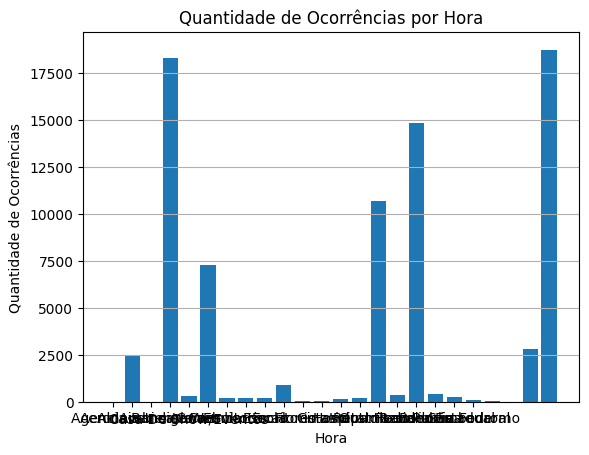

In [6]:
contagem_por_hora = ocorrencias['TIPO DE LOCAL'].value_counts().sort_index()

# Plotar o histograma
plt.bar(contagem_por_hora.index, contagem_por_hora.values)
plt.xlabel('Hora')
plt.ylabel('Quantidade de Ocorrências')
plt.title('Quantidade de Ocorrências por Hora')
plt.xticks(range(20))  # Definir os ticks no eixo x de 0 a 23 (horas)
plt.grid(axis='y')  # Adicionar linhas de grade no eixo y
plt.show()